# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

In [55]:
def plot_total(run_folder: str, rho_folder: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    rho_folder_path = os.path.join(run_folder_path, rho_folder)

    results = {
        'Infected': {
            'Total': [],
            'STD': [],
        },
        'Hospitalised': {
            'Total': [],
            'STD': [],
        },
        'Dead': {
            'Total': [],
            'STD': [],
        }
    }
    
    for filename in os.listdir(rho_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T=(\d+\.\d+)_\d+\.\d+_totals.csv', filename)
        
        if match is None:
            continue
        
        threshold = float(match.groups()[0])
        
        for state in results:
            results[state]['Total'].append((threshold, pd.read_csv(os.path.join(rho_folder_path, filename)).iloc[-1][state]))
            results[state]['STD'].append((threshold, pd.read_csv(os.path.join(rho_folder_path, filename)).iloc[-1][f'{state}_STD']))
            
    plt.figure(figsize=(7, 4))
    plt.title('Threshold vs State Totals ({rho_folder})'.format(rho_folder=rho_folder))
    plt.xlabel('Threshold required for vacciantion, ρ')
    plt.ylabel('Total Percentage of Population')
    
    for state in results:
        totals = results[state]['Total']
        totals.sort()
        stds = results[state]['STD']
        stds.sort()
        
        plt.scatter([t[0] for t in totals], [t[1] for t in totals], label=state)
        plt.errorbar([t[0] for t in totals], [t[1] for t in totals], yerr=[s[1] for s in stds], alpha=0.25)
        
    plt.legend()
    plt.show()

In [47]:
def plot_curve(run_folder: str, rho_folder: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    rho_folder_path = os.path.join(run_folder_path, rho_folder)
    
    spread_results = []
    peak_results = []
    
    for filename in os.listdir(rho_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T=(\d+\.\d+)_\d+\.\d+_states.csv', filename)

        if match is None:
            continue
        
        threshold = float(match.groups()[0])
        
        states_df = pd.read_csv(os.path.join(rho_folder_path, filename))
        
        spread_results.append((threshold, np.std(states_df['Hospitalised'])))
        peak_results.append((threshold, np.max(states_df['Hospitalised'])))
        
    plt.figure(figsize=(7, 4))
    
    plt.plot([r[0] for r in spread_results], [r[1] for r in spread_results], label='Spread')
    plt.plot([r[0] for r in peak_results], [r[1] for r in peak_results], label='Peak')
    
    plt.title("Threshold vs 'Flatness' of Hospitalised Curve")
    plt.xlabel('Threshold required for vacciantion')
    plt.ylabel("'Flatness' of Hospitalised Curve")
    
    plt.legend()
    plt.plot()

# Rho = 0.100

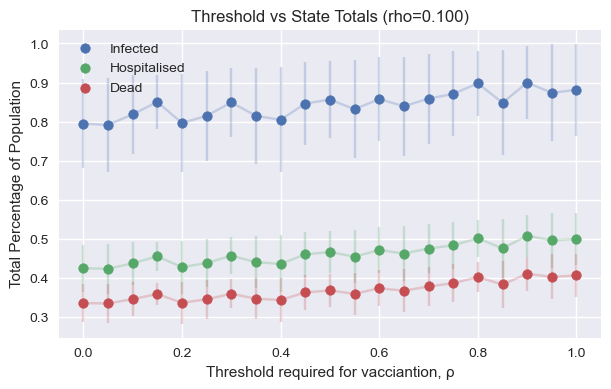

In [56]:
plot_total('threshold_dependent', 'rho=0.100')

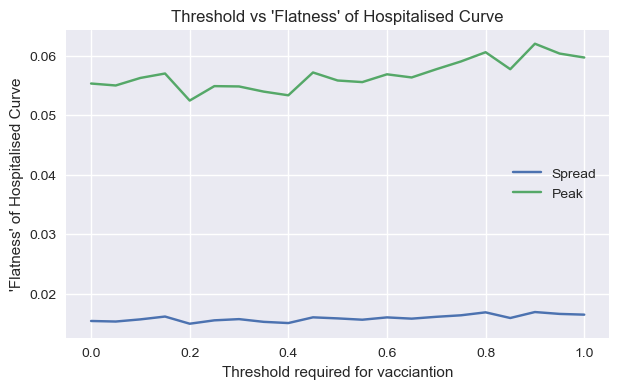

In [48]:
plot_curve('threshold_dependent', 'rho=0.100')

# Rho = 0.250

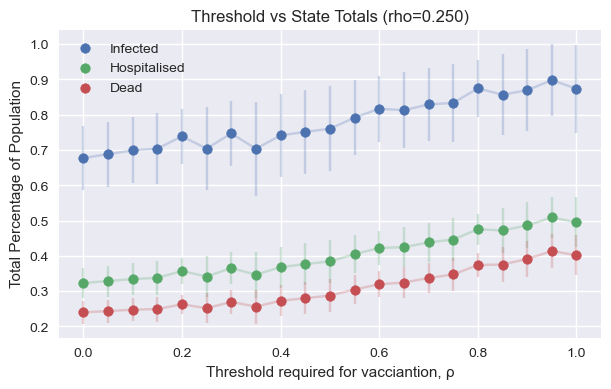

In [57]:
plot_total('threshold_dependent', 'rho=0.250')

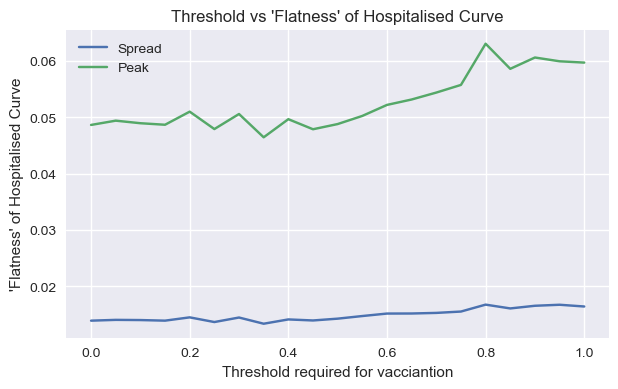

In [58]:
plot_curve('threshold_dependent', 'rho=0.250')